 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

In [2]:
# Set the file paths for the CSVs mentioned above using pathlib 
whale_df = Path("Resources/whale_returns.csv")
algo_df = Path("Resources/algo_returns.csv")
sp500_df = Path("Resources/sp500_history.csv")

# Importing three other CSV files in the resources foldert 
aapl_df = Path("Resources/aapl_historical.csv")
cost_df = Path("Resources/cost_historical.csv")
goog_df = Path("Resources/goog_historical.csv")

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [3]:
# Reading whale returns
whale_df = pd.read_csv(whale_df, index_col="Date", parse_dates=True, infer_datetime_format=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


In [4]:
# Count nulls
whale_df.isnull()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,True,True,True,True
2015-03-03,False,False,False,False
2015-03-04,False,False,False,False
2015-03-05,False,False,False,False
2015-03-06,False,False,False,False
...,...,...,...,...
2019-04-25,False,False,False,False
2019-04-26,False,False,False,False
2019-04-29,False,False,False,False


In [5]:
# Drop nulls
whale_df.dropna(inplace=True)
whale_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [6]:
# Reading algorithmic returns
algo_df = pd.read_csv(algo_df, index_col="Date", parse_dates=True, infer_datetime_format=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [7]:
# Count nulls
algo_df.isnull()
algo_df

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


In [8]:
# Drop nulls
algo_df.dropna(inplace=True)
algo_df

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [9]:
# Reading S&P 500 Closing Prices
sp500_df = pd.read_csv(sp500_df, index_col="Date", parse_dates=True, infer_datetime_format=True)
sp500_df

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06
...,...
2012-10-05,$1460.93
2012-10-04,$1461.40
2012-10-03,$1450.99


In [10]:
# Check Data Types
sp500_df.dtypes

Close    object
dtype: object

In [11]:
# Fix Data Types by dropping the $ sign in the 'Close' Column. Source https://pbpython.com/currency-cleanup.html 
sp500_df['Close'] = sp500_df['Close'].replace({'\$': '', ',': ''}, regex=True).astype(float)

In [12]:
# Calculate Daily Returns
sp500_df = sp500_df.pct_change()
sp500_df.head()

,Close
Date,
2019-04-23,NaN
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279


In [13]:
# Drop nulls
sp500_df.dropna(inplace=True)
sp500_df

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509
...,...
2012-10-05,0.003469
2012-10-04,0.000322
2012-10-03,-0.007123


In [14]:
# Rename `Close` Column to be specific to this portfolio.
sp500_df.columns=['S&P 500']
sp500_df.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


## Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
portfolio_concat_df = pd.concat([whale_df, algo_df, sp500_df], axis="columns", join="inner")
portfolio_concat_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

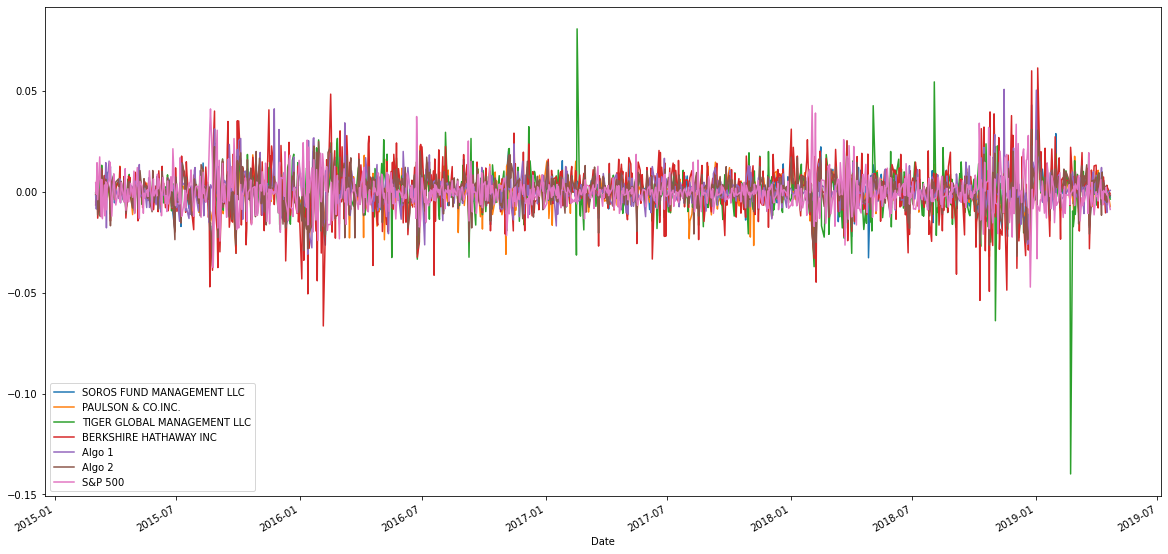

In [16]:
# Plot daily returns of all portfolios
portfolio_concat_df.plot(figsize=(20,10))

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

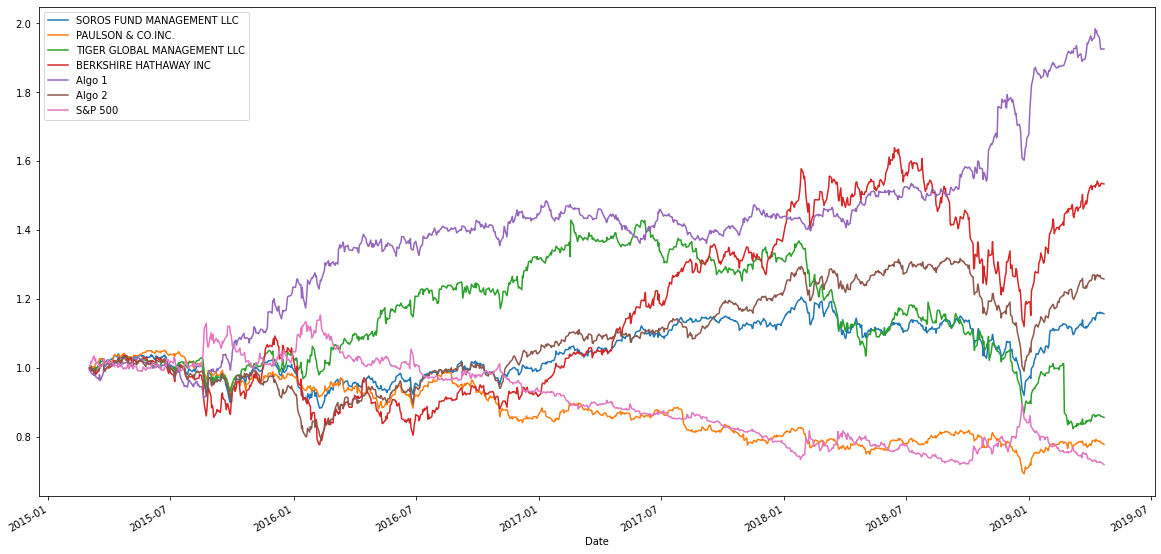

In [17]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + portfolio_concat_df).cumprod()
cumulative_returns.head()

# Plot cumulative returns
cumulative_returns.plot(figsize=(20,10))

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


<AxesSubplot:>

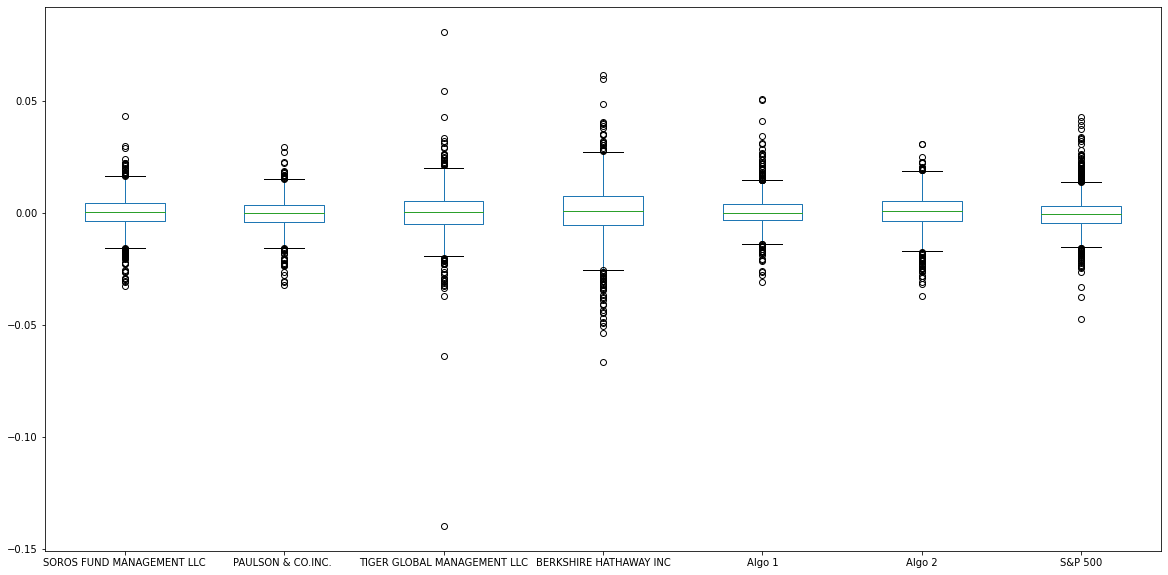

In [18]:
# Box plot to visually show risk (Neeed to review how to read Box plots 🤦🏽‍♂️)
portfolio_concat_df.plot.box(figsize=(20,10))


### Calculate Standard Deviations

In [19]:
# Calculate the daily standard deviations of all portfolios
portfolios_std = portfolio_concat_df.std()
portfolios_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [20]:
# Calculate  the daily standard deviation of S&P 500
portfolios_std['S&P 500']

# Determine which portfolios are riskier than the S&P 500
portfolios_std[(portfolios_std['S&P 500'] < portfolios_std)]

TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

### Calculate the Annualized Standard Deviation

In [21]:
# Calculate the annualized standard deviation (252 trading days)
pannualized_std = portfolios_std * np.sqrt(252)
pannualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

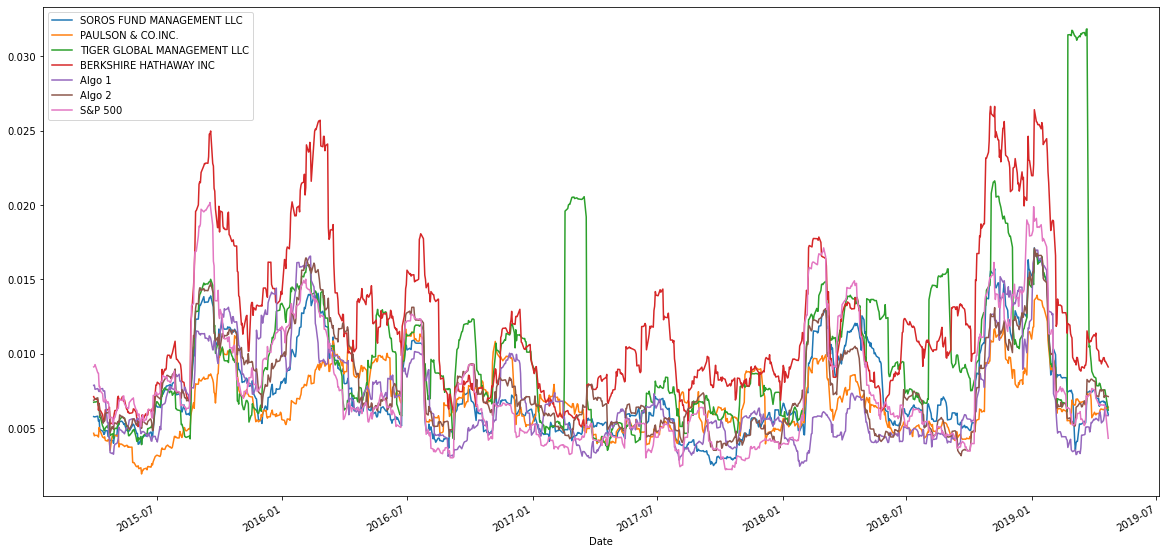

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
portfolio_std_21 = portfolio_concat_df.rolling(window=21).std()
portfolio_std_21

# Plot the rolling standard deviation
portfolio_std_21.plot(figsize = (20,10))

### Calculate and plot the correlation

In [23]:
# Calculate the correlation
portfolio_concat_df.corr()

# Display de correlation matrix


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 500

In [56]:
# Calculate covariance of a single portfolio
covariance = portfolio_concat_df['SOROS FUND MANAGEMENT LLC'].cov(portfolio_concat_df['S&P 500'])
covariance

# Calculate variance of S&P 500
variance = portfolio_concat_df['S&P 500'].var()
variance

# Computing beta
soros_beta = covariance / variance

# Plot beta trend
soros_beta.plot(figsize=(20,10), title='Rolling Beta of SOROS FUND MANAGEMENT LLC')

AttributeError: 'numpy.float64' object has no attribute 'plot'

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

In [25]:
# Use `ewm` to calculate the rolling window
portfolio_concat_df.ewm(halflife=21).std().head()


,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003962
2015-03-05,0.002677,0.004968,0.002478,0.007020,0.004162,0.002662,0.007961
2015-03-06,0.005349,0.004615,0.004665,0.009387,0.003419,0.007166,0.008178
2015-03-09,0.004638,0.004471,0.005496,0.008066,0.002999,0.006290,0.009475


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [26]:
# Annualized Sharpe Ratios
sharpe_ratios = (portfolio_concat_df.mean() * 252) / (portfolio_concat_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

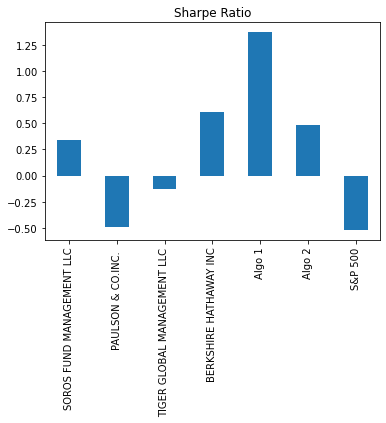

In [27]:
# Visualize the sharpe ratios as a bar plot (can I get the Algo 1 Code please 😎)
sharpe_ratios.plot(kind='bar', title='Sharpe Ratio')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Both Algorithmic strategies outperform the S&P 500 and 3 Funds from the Whales Portfolio. The Algorithmic strategy called 'Algo 1' outperformed everyone. 💸

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [28]:
# Reading data from 1st stock
uber_path = Path("Resources/uber_historical.csv")
uber_df = pd.read_csv(uber_path, index_col='Date', infer_datetime_format=True,  parse_dates=True, usecols=['Date','Close'])
uber_df.tail()

,Close
Date,
2020-12-23 16:00:00,53.71
2020-12-24 13:00:00,52.88
2020-12-28 16:00:00,51.97
2020-12-29 16:00:00,52.27
2020-12-30 16:00:00,53.15


In [29]:
# Reading data from 2nd stock
pavm_path = Path("Resources/pavm_historical.csv")
pavm_df = pd.read_csv(pavm_path, index_col='Date', infer_datetime_format=True,  parse_dates=True, usecols=['Date','Close'])
pavm_df.tail()

,Close
Date,
2020-12-23 16:00:00,1.86
2020-12-24 13:00:00,1.95
2020-12-28 16:00:00,2.13
2020-12-29 16:00:00,2.11
2020-12-30 16:00:00,2.11


In [30]:
# Reading data from 3rd stock
aal_path = Path("Resources/aal_historical.csv")
aal_df = pd.read_csv(aal_path, index_col='Date', infer_datetime_format=True,  parse_dates=True, usecols=['Date','Close'])
aal_df.tail()

,Close
Date,
2020-12-23 16:00:00,15.89
2020-12-24 13:00:00,15.66
2020-12-28 16:00:00,16.06
2020-12-29 16:00:00,15.86
2020-12-30 16:00:00,16.15


In [31]:
# Reading data from 4th stock
pk_path = Path("Resources/pk_historical.csv")
pk_df = pd.read_csv(pk_path, index_col='Date', infer_datetime_format=True,  parse_dates=True, usecols=['Date','Close'])
pk_df.tail()

,Close
Date,
2020-12-23 16:00:00,16.98
2020-12-24 13:00:00,17.19
2020-12-28 16:00:00,17.51
2020-12-29 16:00:00,17.16
2020-12-30 16:00:00,17.29


In [32]:
# Reading data from 5th stock
wfc_path = Path("Resources/wfc_historical.csv")
wfc_df = pd.read_csv(wfc_path, index_col='Date', infer_datetime_format=True,  parse_dates=True, usecols=['Date','Close'])
wfc_df.tail()

,Close
Date,
2020-12-23 16:00:00,30.35
2020-12-24 13:00:00,29.84
2020-12-28 16:00:00,29.93
2020-12-29 16:00:00,29.78
2020-12-30 16:00:00,29.75


In [33]:
# Combine all stocks in a single DataFrame
fva_portfolio = pd.concat([uber_df, pavm_df, aal_df, pk_df, wfc_df], axis="columns", join="inner")
fva_portfolio.head()

,Close,Close,Close,Close,Close
Date,,,,,
2020-01-02 16:00:00,30.99,1.20,29.09,25.25,53.75
2020-01-03 16:00:00,31.37,1.15,27.65,25.31,53.42
2020-01-06 16:00:00,31.58,1.17,27.32,24.74,53.10
2020-01-07 16:00:00,32.81,1.16,27.22,24.33,52.66
2020-01-08 16:00:00,33.93,1.19,27.84,24.42,52.82


In [34]:
# Reset Date index
# fva_portfolio.reset_index(inplace = True) 
# fva_portfolio.reset_index(level =['Date'], inplace = True)
fva_portfolio.reset_index()



,Date,Close,Close,Close,Close,Close
0,2020-01-02 16:00:00,30.99,1.20,29.09,25.25,53.75
1,2020-01-03 16:00:00,31.37,1.15,27.65,25.31,53.42
2,2020-01-06 16:00:00,31.58,1.17,27.32,24.74,53.10
3,2020-01-07 16:00:00,32.81,1.16,27.22,24.33,52.66
4,2020-01-08 16:00:00,33.93,1.19,27.84,24.42,52.82
...,...,...,...,...,...,...
247,2020-12-23 16:00:00,53.71,1.86,15.89,16.98,30.35
248,2020-12-24 13:00:00,52.88,1.95,15.66,17.19,29.84
249,2020-12-28 16:00:00,51.97,2.13,16.06,17.51,29.93
250,2020-12-29 16:00:00,52.27,2.11,15.86,17.16,29.78


In [35]:
# Reorganize portfolio data by having a column per symbol
columns = ["UBER", "PAVM", "AAL", "PK", "WFC"]
fva_portfolio.columns = columns
fva_portfolio.tail()

,UBER,PAVM,AAL,PK,WFC
Date,,,,,
2020-12-23 16:00:00,53.71,1.86,15.89,16.98,30.35
2020-12-24 13:00:00,52.88,1.95,15.66,17.19,29.84
2020-12-28 16:00:00,51.97,2.13,16.06,17.51,29.93
2020-12-29 16:00:00,52.27,2.11,15.86,17.16,29.78
2020-12-30 16:00:00,53.15,2.11,16.15,17.29,29.75


In [36]:
# Calculate daily returns
fva_returns = fva_portfolio.pct_change()
fva_returns.head()
# Drop NAs
fva_returns.dropna(inplace=True)
# Display sample data
fva_returns.head()

,UBER,PAVM,AAL,PK,WFC
Date,,,,,
2020-01-03 16:00:00,0.012262,-0.041667,-0.049502,0.002376,-0.006140
2020-01-06 16:00:00,0.006694,0.017391,-0.011935,-0.022521,-0.005990
2020-01-07 16:00:00,0.038949,-0.008547,-0.003660,-0.016572,-0.008286
2020-01-08 16:00:00,0.034136,0.025862,0.022777,0.003699,0.003038
2020-01-09 16:00:00,0.001179,0.159664,0.003951,-0.025799,-0.001704


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [37]:
# Set weights
weights = [1/3, 1/3, 1/3, 1/3, 1/3]

# Calculate portfolio return
fva_weighted = fva_returns.dot(weights)
fva_weighted.sum()

# Display sample data
fva_weighted.head()

Date
2020-01-03 16:00:00   -0.027556
2020-01-06 16:00:00   -0.005453
2020-01-07 16:00:00    0.000628
2020-01-08 16:00:00    0.029838
2020-01-09 16:00:00    0.045764
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [38]:
# For this analysis I am obliged to create new dataframes for my portfolio as I previously added year 2020 and the Whales 
# Portfolio and the S&P 500 Historicals latest yeat is 2019. Therefore there will be a set of repetitions and an addition of cells.  

uber19_path = Path("Resources/uber_2019.csv")
uber_19 = pd.read_csv(uber19_path, infer_datetime_format=True,  parse_dates=True, usecols=['Date','Close'])

pavm19_path = Path("Resources/pavm_2019.csv")
pavm_19 = pd.read_csv(pavm19_path, infer_datetime_format=True,  parse_dates=True, usecols=['Date','Close'])

aal19_path = Path("Resources/aal_2019.csv")
aal_19 = pd.read_csv(aal19_path, infer_datetime_format=True,  parse_dates=True, usecols=['Date','Close'])

pk19_path = Path("Resources/pk_2019.csv")
pk_19 = pd.read_csv(pk19_path, infer_datetime_format=True,  parse_dates=True, usecols=['Date','Close'])

wfc19_path = Path("Resources/wfc_2019.csv")
wfc_19 = pd.read_csv(wfc19_path, infer_datetime_format=True,  parse_dates=True, usecols=['Date','Close'])
wfc_19.tail()

,Date,Close
246,12/23/2019 16:00:00,53.81
247,12/24/2019 13:00:00,53.82
248,12/26/2019 16:00:00,54.15
249,12/27/2019 16:00:00,53.92
250,12/30/2019 16:00:00,53.60


In [39]:

wfc_19['Date'] = pd.to_datetime(wfc_19['Date'])
#wfc_19['Date'] = wfc_19['Date'].str.replace(‘’, ‘’)
wfc_19['Trade Day'] = wfc_19['Date'].dt.date
wfc_19.tail()

,Date,Close,Trade Day
246,2019-12-23 16:00:00,53.81,2019-12-23
247,2019-12-24 13:00:00,53.82,2019-12-24
248,2019-12-26 16:00:00,54.15,2019-12-26
249,2019-12-27 16:00:00,53.92,2019-12-27
250,2019-12-30 16:00:00,53.60,2019-12-30


In [40]:
# Combine my 2019 Portfolio Data
fva_df = pd.concat([uber_19, pavm_19, aal_19, pk_19, wfc_19], axis="columns", join="inner")
fva_df = fva_df.drop(columns=["Date"])
fva_df.head()

,Close,Close,Close,Close,Close,Trade Day
0,41.57,1.03,32.48,25.56,46.94,2019-01-02
1,37.10,1.06,30.06,25.58,46.57,2019-01-03
2,39.96,1.05,32.04,26.27,47.95,2019-01-04
3,41.29,1.08,32.95,26.72,47.64,2019-01-07
4,43.00,1.08,32.42,27.95,47.54,2019-01-08


In [41]:
# Rename columns
columns = ["UBER", "PAVM", "AAL", "PK", "WFC", "Trade Day"]
fva_df.columns = columns
fva_df.head()

,UBER,PAVM,AAL,PK,WFC,Trade Day
0,41.57,1.03,32.48,25.56,46.94,2019-01-02
1,37.10,1.06,30.06,25.58,46.57,2019-01-03
2,39.96,1.05,32.04,26.27,47.95,2019-01-04
3,41.29,1.08,32.95,26.72,47.64,2019-01-07
4,43.00,1.08,32.42,27.95,47.54,2019-01-08


In [42]:
# Rename columns
columns = ["UBER", "PAVM", "AAL", "PK", "WFC", "Date"]
fva_df.columns = columns
fva_df.head()

,UBER,PAVM,AAL,PK,WFC,Date
0,41.57,1.03,32.48,25.56,46.94,2019-01-02
1,37.10,1.06,30.06,25.58,46.57,2019-01-03
2,39.96,1.05,32.04,26.27,47.95,2019-01-04
3,41.29,1.08,32.95,26.72,47.64,2019-01-07
4,43.00,1.08,32.42,27.95,47.54,2019-01-08


In [43]:
# Use a list of re-ordered column names to alter the column order of the original DataFrame
fva_df = fva_df[["Date", "UBER", "PAVM", "AAL", "PK", "WFC"]]
fva_df.set_index('Date', inplace=True)
fva_df.head()

,UBER,PAVM,AAL,PK,WFC
Date,,,,,
2019-01-02,41.57,1.03,32.48,25.56,46.94
2019-01-03,37.10,1.06,30.06,25.58,46.57
2019-01-04,39.96,1.05,32.04,26.27,47.95
2019-01-07,41.29,1.08,32.95,26.72,47.64
2019-01-08,43.00,1.08,32.42,27.95,47.54


In [44]:
# Calculate daily returns
fva_dailyrt = fva_df.pct_change()

# Drop NAs
fva_dailyrt.dropna(inplace=True)

# Display sample data# Drop NAs
fva_dailyrt.head()

,UBER,PAVM,AAL,PK,WFC
Date,,,,,
2019-01-03,-0.107529,0.029126,-0.074507,0.000782,-0.007882
2019-01-04,0.077089,-0.009434,0.065868,0.026974,0.029633
2019-01-07,0.033283,0.028571,0.028402,0.017130,-0.006465
2019-01-08,0.041414,0.000000,-0.016085,0.046033,-0.002099
2019-01-09,-0.025349,0.074074,0.030845,0.007871,0.005469


In [45]:
# Join your returns DataFrame to the original returns DataFrame
combined_portfolios = pd.concat([fva_dailyrt, whale_df, sp500_df, algo_df], axis="columns", join="outer")
combined_portfolios.head()

,UBER,PAVM,AAL,PK,WFC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,,,,,,
2012-10-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000872,NaN,NaN
2012-10-02 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.003611,NaN,NaN
2012-10-03 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.007123,NaN,NaN
2012-10-04 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000322,NaN,NaN
2012-10-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.003469,NaN,NaN


In [46]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_portfolios.dropna(inplace=True)
combined_portfolios

,UBER,PAVM,AAL,PK,WFC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,,,,,,
2019-01-03,-0.107529,0.029126,-0.074507,0.000782,-0.007882,-0.007848,-0.007403,-0.008478,-0.032053,-0.033196,0.015246,-0.011792
2019-01-04,0.077089,-0.009434,0.065868,0.026974,0.029633,0.029881,0.027032,0.033560,0.061341,-0.006962,0.017622,0.030509
2019-01-07,0.033283,0.028571,0.028402,0.017130,-0.006465,0.009051,0.014475,0.014111,0.017185,-0.009602,0.014748,0.016942
2019-01-08,0.041414,0.000000,-0.016085,0.046033,-0.002099,0.010760,0.008050,0.001544,0.005851,-0.004081,0.010825,0.010479
2019-01-09,-0.025349,0.074074,0.030845,0.007871,0.005469,0.008630,-0.000800,-0.000534,0.019788,-0.004498,0.000214,0.009658
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.010768,0.043860,-0.027097,-0.009718,0.006023,-0.001422,-0.001156,0.000398,-0.010492,-0.000509,-0.004331,-0.004572
2019-04-16,-0.026067,0.016807,0.008296,-0.007281,0.018815,0.002699,0.000388,-0.000831,0.000837,0.002279,-0.006945,0.002899
2019-04-17,-0.016765,0.000000,0.010285,-0.010842,-0.002099,-0.002897,-0.006467,-0.004409,0.003222,-0.001577,-0.010301,-0.005228


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [47]:
# Calculate the annualized `std`
comp_annualized_std = combined_portfolios * np.sqrt(252)
comp_annualized_std

,UBER,PAVM,AAL,PK,WFC,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500,Algo 1,Algo 2
Date,,,,,,,,,,,,
2019-01-03,-1.706977,0.462364,-1.182768,0.012421,-0.125129,-0.124580,-0.117523,-0.134579,-0.508824,-0.526968,0.242024,-0.187190
2019-01-04,1.223749,-0.149760,1.045626,0.428202,0.470406,0.474353,0.429114,0.532754,0.973762,-0.110512,0.279739,0.484318
2019-01-07,0.528356,0.453557,0.450868,0.271927,-0.102630,0.143687,0.229776,0.224007,0.272800,-0.152430,0.234120,0.268952
2019-01-08,0.657433,0.000000,-0.255341,0.730750,-0.033322,0.170806,0.127792,0.024507,0.092889,-0.064789,0.171840,0.166349
2019-01-09,-0.402400,1.175889,0.489652,0.124951,0.086819,0.136990,-0.012695,-0.008483,0.314122,-0.071405,0.003393,0.153310
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-04-15,-0.170935,0.696250,-0.430154,-0.154266,0.095609,-0.022573,-0.018356,0.006317,-0.166561,-0.008082,-0.068757,-0.072573
2019-04-16,-0.413801,0.266798,0.131700,-0.115579,0.298686,0.042852,0.006162,-0.013191,0.013282,0.036177,-0.110244,0.046027
2019-04-17,-0.266131,0.000000,0.163270,-0.172109,-0.033315,-0.045984,-0.102663,-0.069998,0.051150,-0.025027,-0.163524,-0.082994


### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

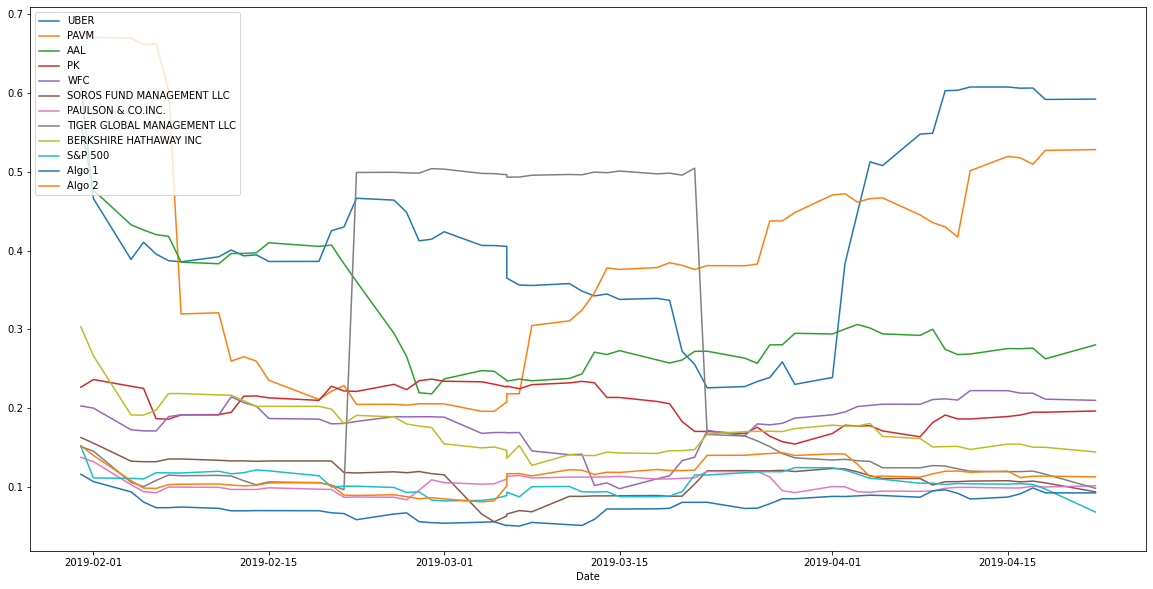

In [48]:
# Calculate rolling standard deviation. chose a one liner for effeciency. 
comp_annualized_std.rolling(window=21).std().plot(figsize = (20,10))
# Plot rolling standard deviation
# comp_annualized_std.rolling(window=21).plot(figsize = (20,10))

### Calculate and plot the correlation

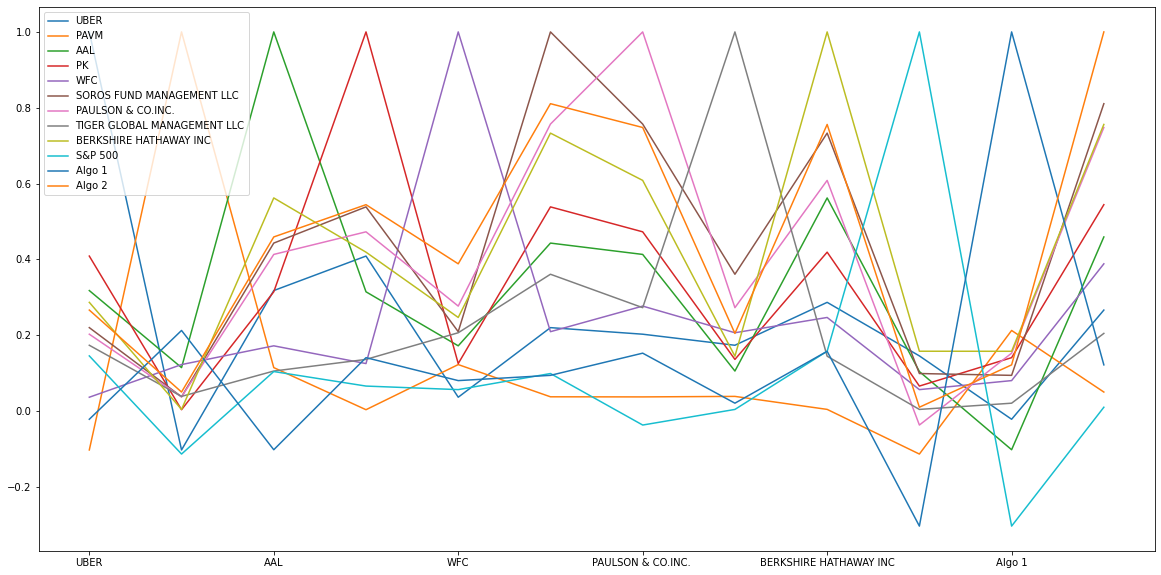

In [49]:
# Calculate and plot the correlation
portfolios_corr = combined_portfolios.corr().plot(figsize = (20,10))


### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:title={'center':'Rolling 60-Day Beta of Vals Portfolio'}, xlabel='Date'>

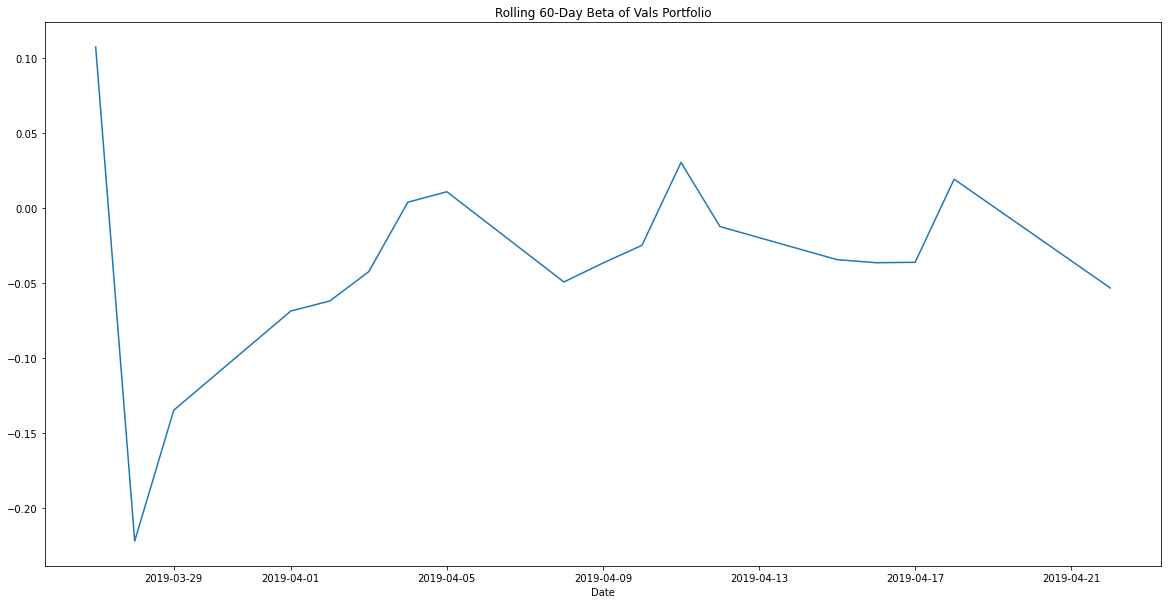

In [50]:
# Calculate and plot Beta
# Set weights
weights = [0.2, 0.2, 0.2, 0.2, 0.2]

# Calculate portfolio return
portfolio19_weighted = fva_dailyrt.dot(weights)
portfolio19_weighted

combined_portfolios['Vals Portfolio']=portfolio19_weighted
combined_portfolios = combined_portfolios.drop(columns=["UBER","PAVM","AAL","PK","WFC"])

covariance = combined_portfolios['Vals Portfolio'].cov(combined_portfolios['S&P 500'])
variance = combined_portfolios['Vals Portfolio'].var()
vals_beta = covariance / variance

rolling_covariance = combined_portfolios['Vals Portfolio'].rolling(window=60).cov(combined_portfolios['S&P 500'])
rolling_variance = combined_portfolios['S&P 500'].rolling(window=60).var()

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(figsize=(20, 10), title='Rolling 60-Day Beta of Vals Portfolio')


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [51]:
# Calculate Annualzied Sharpe Ratios
sharpe_ratios = (combined_portfolios.mean() * 252) / (combined_portfolios.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      4.655809
PAULSON & CO.INC.              1.988543
TIGER GLOBAL MANAGEMENT LLC   -0.397697
BERKSHIRE HATHAWAY INC         4.516495
S&P 500                       -4.932788
Algo 1                         3.234081
Algo 2                         4.372947
Vals Portfolio                 0.673878
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratio'}>

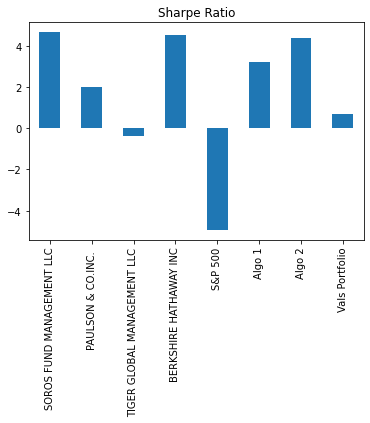

In [52]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratio')

### How does your portfolio do?

Write your answer here!

In [53]:
# Performed way better than the S&P 500. Profitable but on the low performance side compared to the other positive portfolios. 